# Prueba Hito 1 - Análisis de Sentimientos de Twitter - Sebastián Aguilera Madariaga
## Preparando ambiente de trabajo:

In [2]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings(action="ignore")

# Bibliotecas de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn  # Utilizada para analizar la distribución de valores faltantes

# Bibliotecas de NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Bibliotecas de preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Bibliotecas de selección de modelos y evaluación
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    median_absolute_error,
    r2_score,
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# Modelos de aprendizaje automático
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#  Biblioteca que se utiliza para serializar y deserializar objetos
import pickle

- Bibliotecas básicas: Bibliotecas de Python básicas para manipulación de datos de propósito general.

- Bibliotecas para visualización de datos: Bibliotecas para crear visualizaciones y analizar datos faltantes.

- Bibliotecas para procesamiento de lenguaje natural (NLP): Bibliotecas para tareas de procesamiento de lenguaje natural, como tokenización, derivación y lematización.

- Bibliotecas para preprocesamiento: Bibliotecas para tareas de preprocesamiento de datos, como codificación de etiquetas y vectorización.

- Bibliotecas para selección y evaluación de modelos: Bibliotecas para seleccionar modelos y evaluar su rendimiento.

- Modelos de aprendizaje automático: Bibliotecas que contienen diferentes modelos de aprendizaje automático.

In [3]:
# Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sebag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Generar un análisis exploratorio sobre los datos contenidos en el DataFrame, considerando palabras más comunes y distribución de las clases en el vector objetivo.

In [4]:
# Lee un archivo CSV llamado "training_tweets.csv" y lo carga en un 
# objeto de Pandas DataFrame llamado "df". 
# Luego, elimina la columna llamada "Unnamed: 0" del DataFrame utilizando el método "drop".
df = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
df

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry
...,...,...
29995,I do not want to work tomorrow!,sadness
29996,@KandyBee we shuld do a dance like that its s...,fun
29997,"Photo: Got my prints a few days ago, ready for...",happiness
29998,@tove_liden Thanks for the follow Tove!,fun


In [35]:
# Exploración inicial del DataFrame
print(df.head())

                                             content  sentiment
0                    Happy Mama's day to all mothers       love
1  @LysdelTellez I am lost. Please help me find a...      worry
2  @BoomKatt yes yes I AM, networking whore to th...  happiness
3  you@snapplynn Wish that would have been your t...    neutral
4  now i am doing the MicroEconomics project  iha...      worry


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB
None


In [37]:
print(df.describe())

                                                  content sentiment
count                                               30000     30000
unique                                              29881        13
top     I just received a mothers day card from my lov...   neutral
freq                                                   12      6451


In [38]:
print(df.shape)

(30000, 2)


# Analizamos y visualizamos con la librería "missingno" la presencia de valores faltantes o nulos en un conjunto de datos.

<AxesSubplot:>

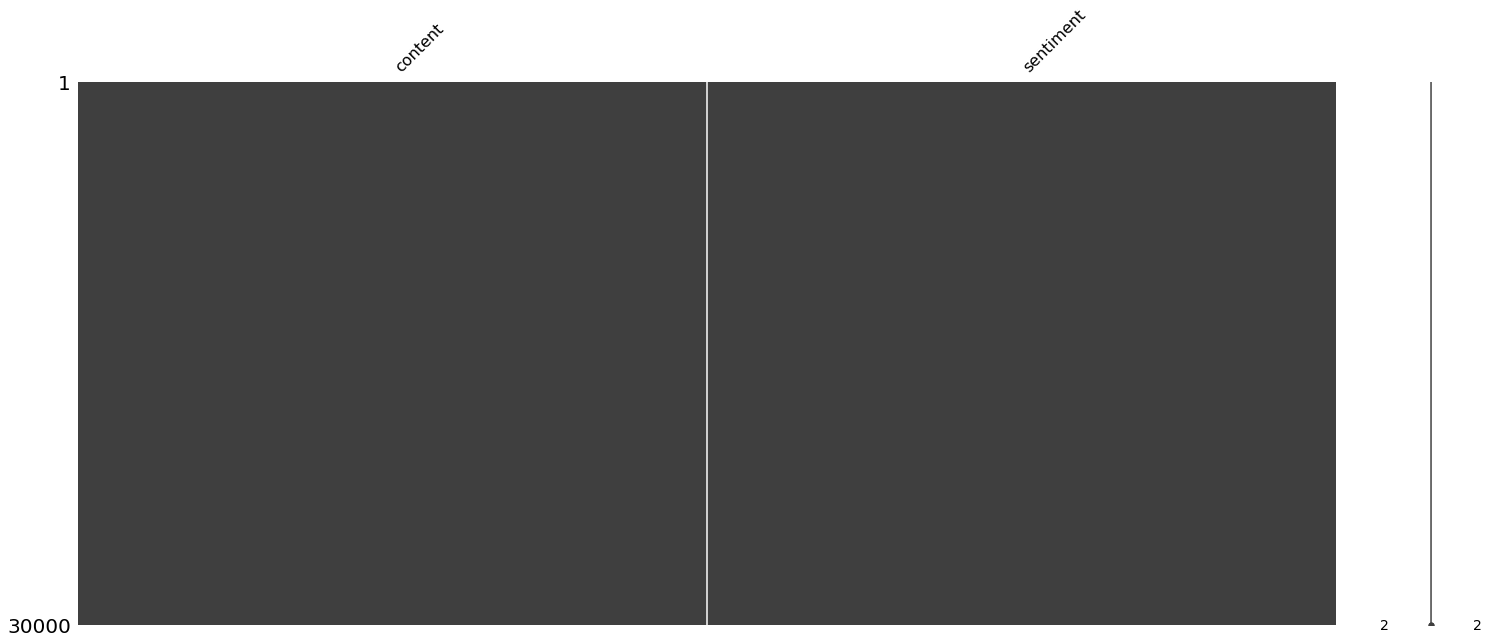

In [39]:
msgn.matrix(df)

<AxesSubplot:>

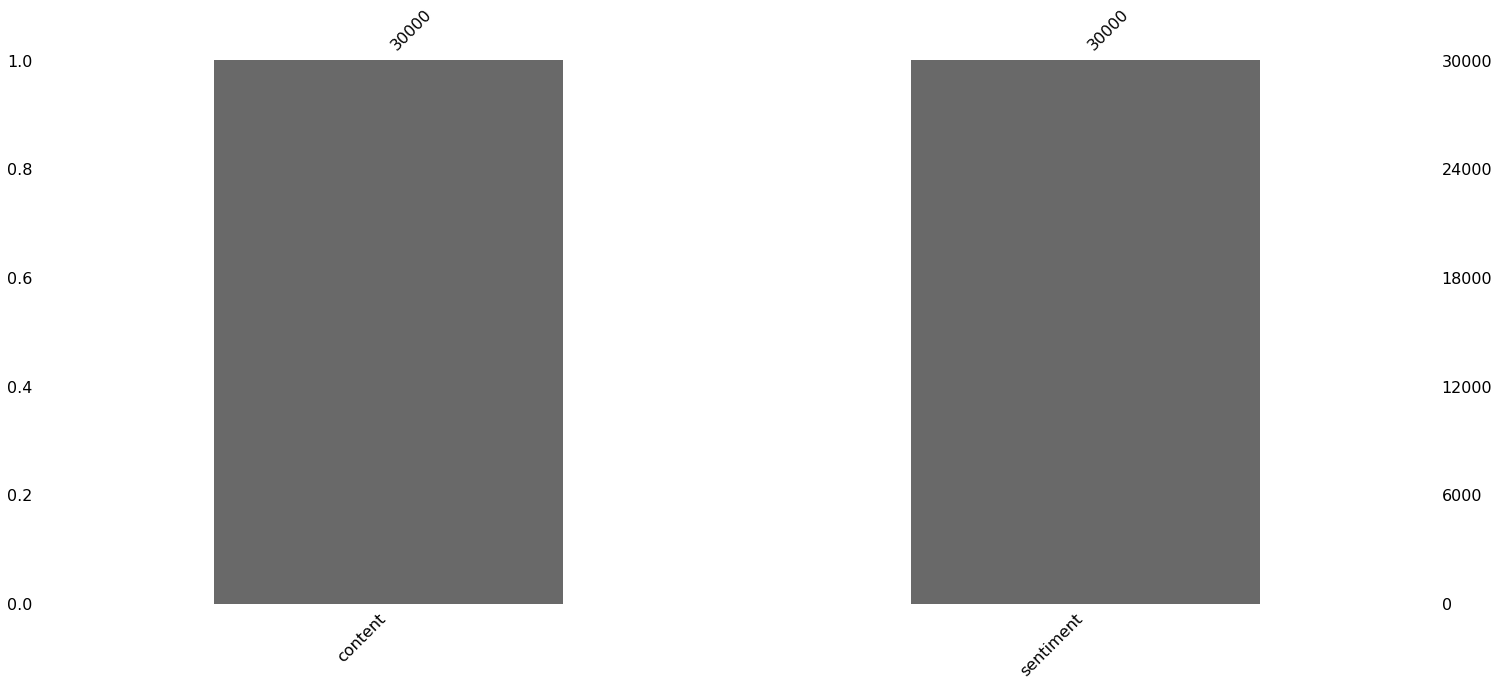

In [40]:
msgn.bar(df)

# No se aprecian espacios en los gráficos ni cantidades desbalanceadas, por lo tanto, asumimos que no hay NaNs ni valores faltantes.

# 2. Preprocesamiento de Texto:
La columna "content" del DataFrame contiene los textos que debemos procesar.
Se aplicarán las bibliotecas de NLP, nltk: from nltk.corpus import stopwords, from nltk.tokenize import word_tokenize, from nltk.stem import PorterStemmer,
from nltk.stem import WordNetLemmatizer.

In [41]:
# Se define función de preprocesamiento de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Tokenizar texto en palabras
    palabras = word_tokenize(text)
    # Eliminar signos de puntuación y caracteres especiales
    palabras = [palabra for palabra in palabras if palabra.isalpha()]
    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    palabras = [palabra for palabra in palabras if not palabra in stop_words]
    # Realizar stemming
    ps = PorterStemmer()
    palabras = [ps.stem(palabra) for palabra in palabras]
    # Realizar lemmatization
    wnl = WordNetLemmatizer()
    palabras = [wnl.lemmatize(palabra) for palabra in palabras]
    # Unir palabras en un solo string
    text = ' '.join(palabras)
    return text

In [42]:
# Se aplica preprocesamiento de texto a la columna "content"
df['content'] = df['content'].apply(preprocess_text)

In [43]:
# Ver los primeros 5 registros del DataFrame procesado
df.head

<bound method NDFrame.head of                                                  content  sentiment
0                           happi mama day to all mother       love
1        lysdeltellez i am lost plea help find good home      worry
2      boomkatt ye ye i am network whore to the fulle...  happiness
3      you snapplynn wish that would have been your t...    neutral
4      now i am do the microeconom project ihat thi s...      worry
...                                                  ...        ...
29995                     i do not want to work tomorrow    sadness
29996  kandybe we shuld do danc like that it serious ...        fun
29997  photo got my print few day ago readi for the n...  happiness
29998                          thank for the follow tove        fun
29999                                   esmeeworld thank    neutral

[30000 rows x 2 columns]>

Los modelos de aprendizaje automático no pueden manejar datos de tipo de cadena (strings) directamente, necesitan que los datos se conviertan en valores numéricos para que puedan funcionar correctamente. Por lo tanto, se necesita transformar el texto procesado a una representación numérica antes de entrenar cualquier modelo. Una forma común de hacer esto es mediante el uso de técnicas de vectorización, como Bag of Words o TF-IDF. También usando la función CountVectorizer o TfidfVectorizer de scikit-learn para hacer esto.

# 3. Preparación del vector objetivo y las matrices de entrenamiento y validación:

In [44]:
# Vectorización usando CountVectorizer
cv = CountVectorizer()
# Matriz:
X_cv = cv.fit_transform(df['content'])

# Vectorización usando TfidfVectorizer
tfidf = TfidfVectorizer()
# Matriz:
X_tfidf = tfidf.fit_transform(df['content'])

# Utilizaremos sólo CountVectorizer para el desarrollo de la prueba.

In [45]:
# Obtener los nombres de las características con CountVectorizer:
feature_names_cv = cv.get_feature_names_out()

# Ver la matriz dispersa
print(X_cv.toarray())

# Ver los nombres de las características
print(feature_names_cv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aa' 'aaa' 'aaaa' ... 'zzzzi' 'zzzzz' 'zzzzzzz']


In [46]:
# Obtener los nombres de las características con TfidfVectorizer:
feature_names_tfidf = tfidf.get_feature_names_out()

# Ver la matriz dispersa
print(X_tfidf.toarray())

# Ver los nombres de las características
print(feature_names_tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['aa' 'aaa' 'aaaa' ... 'zzzzi' 'zzzzz' 'zzzzzzz']


In [47]:
def recodificar_emocion(emocion):
    if emocion in ["happiness", "love", "surprise", "fun", "relief", "enthusiasm"]:
        return "Positiva"
    elif emocion in ["worry", "sadness", "hate", "empty", "boredom", "anger"]:
        return "Negativa"
    else:
        return random.choice(["Positiva", "Negativa"])
        
df["sentiment"] = df["sentiment"].apply(lambda x: recodificar_emocion(x))

In [48]:
print(df['sentiment'].unique())

['Positiva' 'Negativa']


In [49]:
# Muestra el dataframe con las emociones recodificadas
df

,content,sentiment
0,happi mama day to all mother,Positiva
1,lysdeltellez i am lost plea help find good home,Negativa
2,boomkatt ye ye i am network whore to the fulle...,Positiva
3,you snapplynn wish that would have been your t...,Negativa
4,now i am do the microeconom project ihat thi s...,Negativa
...,...,...
29995,i do not want to work tomorrow,Negativa
29996,kandybe we shuld do danc like that it serious ...,Positiva
29997,photo got my print few day ago readi for the n...,Positiva
29998,thank for the follow tove,Positiva


In [50]:
df.sample

<bound method NDFrame.sample of                                                  content sentiment
0                           happi mama day to all mother  Positiva
1        lysdeltellez i am lost plea help find good home  Negativa
2      boomkatt ye ye i am network whore to the fulle...  Positiva
3      you snapplynn wish that would have been your t...  Negativa
4      now i am do the microeconom project ihat thi s...  Negativa
...                                                  ...       ...
29995                     i do not want to work tomorrow  Negativa
29996  kandybe we shuld do danc like that it serious ...  Positiva
29997  photo got my print few day ago readi for the n...  Positiva
29998                          thank for the follow tove  Positiva
29999                                   esmeeworld thank  Negativa

[30000 rows x 2 columns]>

Teniendo en cuenta el conjunto de datos proporcionado, que consiste en texto y sentimientos binarios (Positivo o Negativo), se seleccionan los siguientes cinco modelos:

Regresión Logística: La regresión logística es un modelo lineal simple pero eficaz para problemas de clasificación binaria. Es fácil de interpretar y se puede entrenar rápidamente incluso en conjuntos de datos grandes. Puede ser una buena opción para obtener una línea base de rendimiento y comparar con modelos más complejos.

Support Vector Machines (SVM): Las máquinas de vectores de soporte son adecuadas para problemas de clasificación binaria y funcionan bien en espacios de alta dimensión, como los datos de texto. Pueden capturar relaciones no lineales en los datos utilizando funciones kernel y proporcionar un buen rendimiento en conjuntos de datos moderadamente grandes.

Naive Bayes: El clasificador Naive Bayes es un modelo probabilístico que funciona bien en problemas de clasificación de texto. Es rápido y eficiente en términos de memoria. Aunque asume independencia entre las características (lo cual no es realista en la mayoría de los casos), suele funcionar sorprendentemente bien en la clasificación de texto.

Random Forest: El algoritmo de Random Forest es un método de ensamble basado en árboles de decisión que puede manejar tanto problemas de clasificación como de regresión. Proporciona una buena precisión y es menos propenso al sobreajuste. Aunque no es específico para datos de texto, puede funcionar bien si se combina con técnicas adecuadas de extracción de características, como TF-IDF.

Redes neuronales artificiales (ANN): Las redes neuronales, especialmente las redes neuronales convolucionales (CNN) y las redes neuronales recurrentes (RNN), han demostrado ser eficaces en la clasificación de texto. Pueden aprender automáticamente representaciones significativas de las palabras y capturar relaciones contextuales en el texto. Sin embargo, suelen requerir más datos y tiempo de entrenamiento en comparación con otros modelos.

La elección de estos modelos se basa en su aplicabilidad a problemas de clasificación de texto y su capacidad para manejar datos de alta dimensión. Cada uno de estos modelos tiene sus propias ventajas y desventajas, por lo que es útil probar diferentes modelos y comparar sus resultados para encontrar el mejor enfoque para un conjunto de datos específico.

Los hiperparámetros de los modelos que propuse son los siguientes:

- Regresión logística:
penalty: Tipo de regularización (L1 o L2).
C: Inversa de la fuerza de regularización.

- Máquinas de soporte vectorial (SVM):
C: Parámetro de regularización.
kernel: Tipo de kernel a utilizar (lineal, polinómico, RBF, etc.).
gamma: Coeficiente del kernel RBF.

- Árbol de decisión:
criterion: Criterio de selección de variables para dividir un nodo (Gini o entropía).
max_depth: Profundidad máxima del árbol.
min_samples_split: Número mínimo de muestras necesarias para dividir un nodo interno.

- Bosque aleatorio:
n_estimators: Número de árboles en el bosque.
criterion: Criterio de selección de variables para dividir un nodo (Gini o entropía).
max_depth: Profundidad máxima de cada árbol.
min_samples_split: Número mínimo de muestras necesarias para dividir un nodo interno.

- Red neuronal:
hidden_layer_sizes: Tamaño de las capas ocultas.
activation: Función de activación a utilizar (ReLU, sigmoide, etc.).
solver: Algoritmo utilizado para optimizar los pesos.
alpha: Tasa de regularización L2.
learning_rate: Tasa de aprendizaje inicial para los pesos.

Finalmente, podemos crear la matriz de características y el vector objetivo a partir de las columnas 'content' y 'emotion':

Las etiquetas de destino deben ser valores numéricos continuos, y en este caso están siendo proporcionados como etiquetas de clase "Positiva" y "Negativa". Por lo tanto, es necesario realizar una codificación de las etiquetas para convertirlas en valores numéricos antes de entrenar el modelo.

- Regresión logística:
C: Parámetro de regularización inversa. Valores más pequeños especifican una regularización más fuerte. Regularización previene el sobreajuste al agregar una penalización a los coeficientes de la regresión.
penalty: Tipo de regularización a aplicar. Puede ser L1 (valor absoluto) o L2 (cuadrado) de los coeficientes.
solver: Algoritmo utilizado para la optimización. liblinear es un buen algoritmo para conjuntos de datos pequeños y medianos.

- Máquinas de vectores de soporte (SVM):
C: Parámetro de regularización. Controla el equilibrio entre lograr un margen amplio y minimizar las violaciones del margen (clasificación incorrecta de los datos de entrenamiento). Valores más pequeños permiten más violaciones del margen pero generan un margen más amplio.

- Naive Bayes multinomial:
alpha: Parámetro de suavizado de Laplace. Se utiliza para manejar casos en los que una característica no aparece en la clase de entrenamiento, evitando la multiplicación por cero en el cálculo de probabilidades.

- Bosques aleatorios:
n_estimators: Número de árboles en el bosque. Un mayor número de árboles puede mejorar la precisión del modelo, pero también puede aumentar el tiempo de entrenamiento.
max_depth: Profundidad máxima de los árboles. Limitar la profundidad puede ayudar a prevenir el sobreajuste.

- Redes neuronales:
hidden_layer_sizes: Una tupla que indica el número de neuronas en cada capa oculta. Por ejemplo, (100,) indica una capa oculta con 100 neuronas, mientras que (50, 50) indica dos capas ocultas con 50 neuronas cada una.
alpha: Parámetro de regularización L2 (suma de los cuadrados de los pesos). Controla la magnitud de la penalización aplicada a los pesos de la red para prevenir el sobreajuste.
learning_rate_init: Tasa de aprendizaje inicial. Controla el tamaño de los pasos en la actualización de los pesos durante el entrenamiento. Valores más pequeños implican actualizaciones más lentas y un entrenamiento más largo, pero pueden llevar a una convergencia más estable.

# Sobre la regularización:

La regularización es una técnica utilizada en el aprendizaje automático para evitar el sobreajuste (overfitting) en modelos de predicción. El sobreajuste ocurre cuando un modelo es demasiado complejo y se ajusta demasiado bien a los datos de entrenamiento, perdiendo su capacidad de generalización para nuevos datos.

La regularización se realiza mediante la adición de una penalización en la función de pérdida del modelo. Esta penalización agrega un término de regularización a la función de costo, que penaliza los pesos de los términos de la función objetivo que son demasiado grandes, lo que resulta en una solución más suave. La regularización ayuda a limitar la complejidad del modelo, forzando a los coeficientes a ser pequeños, lo que evita el sobreajuste.

In [51]:
label_encoder = LabelEncoder()

X = X_cv
y = label_encoder.fit_transform(df['sentiment'])

LabelEncoder es una clase de la biblioteca scikit-learn en Python que se utiliza para convertir etiquetas categóricas en valores numéricos. En muchas tareas de aprendizaje automático, es necesario transformar las etiquetas categóricas en números, ya que los algoritmos de aprendizaje automático generalmente trabajan con datos numéricos.

La clase LabelEncoder asigna a cada categoría única un número entero diferente, comenzando desde 0 hasta el número de categorías menos uno. Por ejemplo, si tienes tres categorías como "rojo", "verde" y "azul", LabelEncoder podría asignarles los números 0, 1 y 2, respectivamente. La asignación de números a categorías es arbitraria y no implica ningún orden.

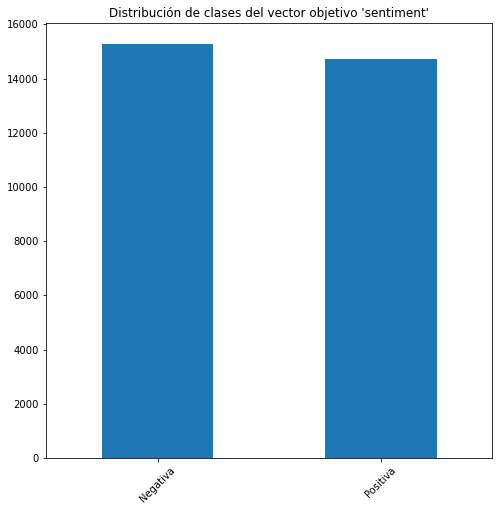

In [52]:
# Frecuencias de sentiment, gráfica del vector objetivo:

plt.figure(figsize=(8,8))
df['sentiment'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("Distribución de clases del vector objetivo 'sentiment'")
plt.show()

# Se aprecia en este gráfico de distribución del vector objetivo 'sentiment' que hay más sentimiento "Negativa" que "Positiva".

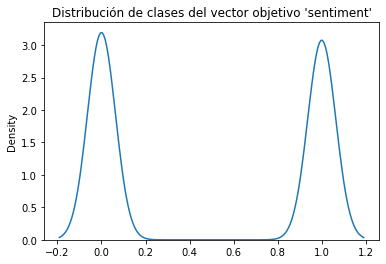

In [53]:
sns.set_color_codes()
sns.distplot(y, hist=False)
plt.title("Distribución de clases del vector objetivo 'sentiment'")
plt.show()

# En este gráfico se aprecia lo mismo que el anterior, salvo que se visualiza que la variable categórica ahora es numérica.

# 4. Entrenamiento de modelos:

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic Regression - Accuracy: 0.6892
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      5046
           1       0.70      0.65      0.67      4854

    accuracy                           0.69      9900
   macro avg       0.69      0.69      0.69      9900
weighted avg       0.69      0.69      0.69      9900

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Mejor puntaje de validación cruzada: 0.68
Desempeño en conjunto de entrenamiento: 0.76
Desempeño en conjunto de validación: 0.69
Matriz de confusión:
[[3664 1382]
 [1695 3159]]


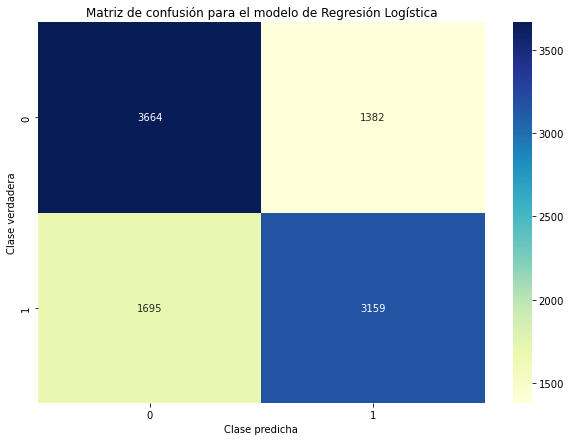

Logistic Regression - AUC-ROC: 0.7525


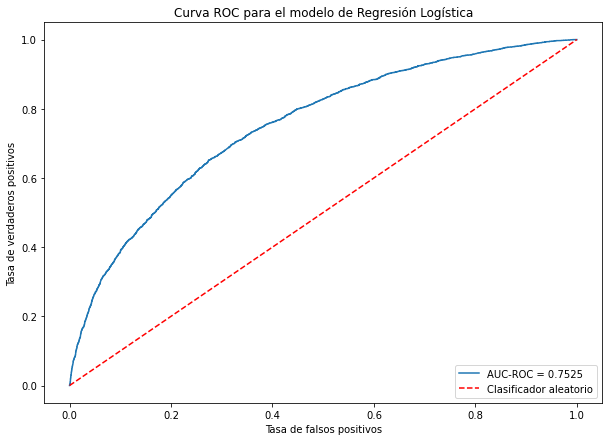

In [55]:
# Regresión logística:

# Definir parámetros para la búsqueda en cuadrícula (GridSearch)
logreg_params = {
    "C": [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
    "penalty": ["l1", "l2"],  # Tipo de regularización
    "solver": ["liblinear"],  # Algoritmo de optimización a usar
}

# Crear un objeto GridSearchCV con el modelo LogisticRegression y los parámetros definidos
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, n_jobs=-1)

# Ajustar el GridSearchCV con los datos de entrenamiento
logreg_grid.fit(X_train, y_train)

# Obtener el mejor modelo de regresión logística después de la búsqueda en cuadrícula
best_logreg = logreg_grid.best_estimator_

# Hacer predicciones usando el mejor modelo de regresión logística
y_pred_logreg = best_logreg.predict(X_test)

# Calcular y mostrar la precisión (accuracy) del modelo
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")

# Imprimir el informe de clasificación con las métricas de evaluación
print(classification_report(y_test, y_pred_logreg))

# Ver los mejores hiperparámetros y puntajes de validación cruzada
print(f"Best parameters: {logreg_grid.best_params_}\n")
print("Mejor puntaje de validación cruzada: {:.2f}".format(logreg_grid.best_score_))

# Reportar desempeño del modelo en conjunto de entrenamiento y validación
print("Desempeño en conjunto de entrenamiento: {:.2f}".format(logreg_grid.score(X_train, y_train)))
print("Desempeño en conjunto de validación: {:.2f}".format(logreg_grid.score(X_test, y_test)))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión para el modelo de Regresión Logística")
plt.show()

# Obtener las probabilidades de clase positiva
y_pred_logreg_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)
print(f"Logistic Regression - AUC-ROC: {auc_roc_logreg:.4f}")

# Calcular la curva ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f"AUC-ROC = {auc_roc_logreg:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Clasificador aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para el modelo de Regresión Logística")
plt.legend(loc="lower right")
plt.show()

Support Vector Machines - Accuracy: 0.6859
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      5046
           1       0.69      0.64      0.67      4854

    accuracy                           0.69      9900
   macro avg       0.69      0.69      0.68      9900
weighted avg       0.69      0.69      0.69      9900

Best parameters: {'C': 0.01}

Mejor puntaje de validación cruzada: 0.68
Desempeño en conjunto de entrenamiento: 0.76
Desempeño en conjunto de validación: 0.69
Matriz de confusión:
[[3664 1382]
 [1728 3126]]


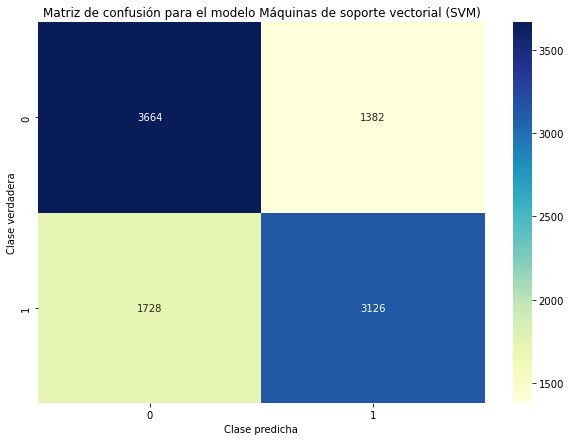

Support Vector Machines - AUC-ROC: 0.7368


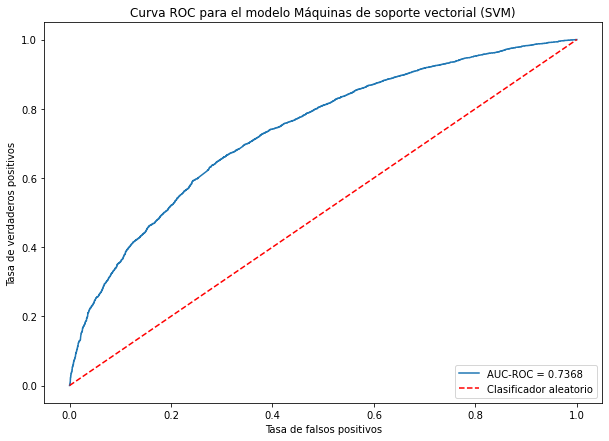

In [56]:
from sklearn.svm import SVC
# Máquinas de vectores de soporte (SVM):

# Definir parámetros para la búsqueda en cuadrícula (GridSearch)
svm_params = {
    "C": [0.001, 0.01, 0.1, 1, 10],  # Parámetro de regularización
}

# Crear un objeto GridSearchCV con el modelo LinearSVC y los parámetros definidos
svm_grid = GridSearchCV(LinearSVC(), svm_params, cv=5, n_jobs=-1)

# Ajustar el GridSearchCV con los datos de entrenamiento
svm_grid.fit(X_train, y_train)

# Obtener el mejor modelo de SVM después de la búsqueda en cuadrícula
best_svm = svm_grid.best_estimator_

# Hacer predicciones usando el mejor modelo de SVM
y_pred_svm = best_svm.predict(X_test)

# Calcular y mostrar la precisión (accuracy) del modelo
print(f"Support Vector Machines - Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

# Imprimir el informe de clasificación con las métricas de evaluación
print(classification_report(y_test, y_pred_svm))

# Imprimir los mejores hiperparámetros encontrados por GridSearchCV
print(f"Best parameters: {svm_grid.best_params_}\n")

# Ver los mejores hiperparámetros y puntajes de validación cruzada
print("Mejor puntaje de validación cruzada: {:.2f}".format(svm_grid.best_score_))

# Reportar desempeño del modelo en conjunto de entrenamiento y validación
print("Desempeño en conjunto de entrenamiento: {:.2f}".format(svm_grid.score(X_train, y_train)))
print("Desempeño en conjunto de validación: {:.2f}".format(svm_grid.score(X_test, y_test)))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión para el modelo Máquinas de soporte vectorial (SVM)")
plt.show()

# Ajustar el mejor modelo de SVM con probabilidad
best_svm_proba = SVC(C=best_svm.C, kernel='linear', probability=True)
best_svm_proba.fit(X_train, y_train)

# Obtener las probabilidades de clase positiva
y_pred_svm_proba = best_svm_proba.predict_proba(X_test)[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc_svm = roc_auc_score(y_test, y_pred_svm_proba)
print(f"Support Vector Machines - AUC-ROC: {auc_roc_svm:.4f}")

# Calcular la curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, label=f"AUC-ROC = {auc_roc_svm:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Clasificador aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para el modelo Máquinas de soporte vectorial (SVM)")
plt.legend(loc="lower right")
plt.show()

Naive Bayes - Accuracy: 0.6764
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      5046
           1       0.72      0.55      0.63      4854

    accuracy                           0.68      9900
   macro avg       0.69      0.67      0.67      9900
weighted avg       0.68      0.68      0.67      9900

Best parameters: {'alpha': 10}

Mejor puntaje de validación cruzada: 0.67
Desempeño en conjunto de entrenamiento: 0.74
Desempeño en conjunto de validación: 0.68
Matriz de confusión:
[[4003 1043]
 [2161 2693]]


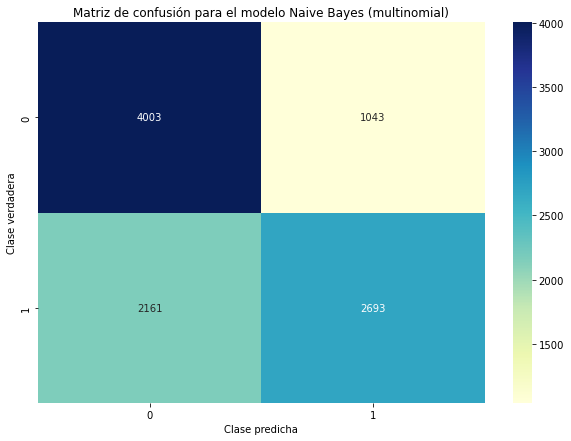

Naive Bayes - AUC-ROC: 0.7468


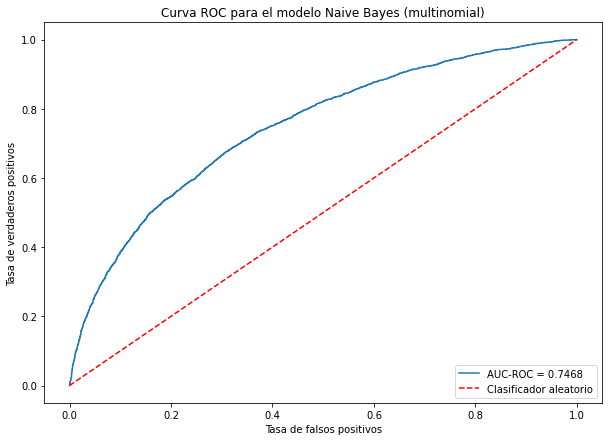

In [57]:
# Modelo Naive Bayes (multinomial):

# Definir parámetros para la búsqueda en cuadrícula (GridSearch)
nb_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10],  # Parámetro de suavizado de Laplace
}

# Crear un objeto GridSearchCV con el modelo MultinomialNB y los parámetros definidos
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, n_jobs=-1)

# Ajustar el GridSearchCV con los datos de entrenamiento
nb_grid.fit(X_train, y_train)

# Obtener el mejor modelo de Naive Bayes multinomial después de la búsqueda en cuadrícula
best_nb = nb_grid.best_estimator_

# Hacer predicciones usando el mejor modelo de Naive Bayes multinomial
y_pred_nb = best_nb.predict(X_test)

# Calcular y mostrar la precisión (accuracy) del modelo
print(f"Naive Bayes - Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")

# Imprimir el informe de clasificación con las métricas de evaluación
print(classification_report(y_test, y_pred_nb))

# Imprimir los mejores hiperparámetros encontrados por GridSearchCV
print(f"Best parameters: {nb_grid.best_params_}\n")

# Ver los mejores hiperparámetros y puntajes de validación cruzada
print("Mejor puntaje de validación cruzada: {:.2f}".format(nb_grid.best_score_))

# Reportar desempeño del modelo en conjunto de entrenamiento y validación
print("Desempeño en conjunto de entrenamiento: {:.2f}".format(nb_grid.score(X_train, y_train)))
print("Desempeño en conjunto de validación: {:.2f}".format(nb_grid.score(X_test, y_test)))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión para el modelo Naive Bayes (multinomial)")
plt.show()

# Obtener las probabilidades de clase positiva
y_pred_nb_proba = best_nb.predict_proba(X_test)[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc_nb = roc_auc_score(y_test, y_pred_nb_proba)
print(f"Naive Bayes - AUC-ROC: {auc_roc_nb:.4f}")

# Calcular la curva ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_nb, tpr_nb, label=f"AUC-ROC = {auc_roc_nb:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Clasificador aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para el modelo Naive Bayes (multinomial)")
plt.legend(loc="lower right")
plt.show()

Random Forest - Accuracy: 0.6814
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      5046
           1       0.69      0.63      0.66      4854

    accuracy                           0.68      9900
   macro avg       0.68      0.68      0.68      9900
weighted avg       0.68      0.68      0.68      9900

Best parameters: {'max_depth': None, 'n_estimators': 200}

Mejor puntaje de validación cruzada: 0.67
Desempeño en conjunto de entrenamiento: 1.00
Desempeño en conjunto de validación: 0.68
Matriz de confusión:
[[3701 1345]
 [1809 3045]]


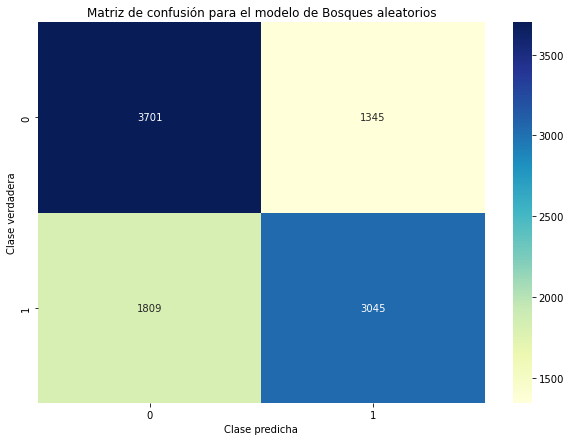

Random Forest - AUC-ROC: 0.7403


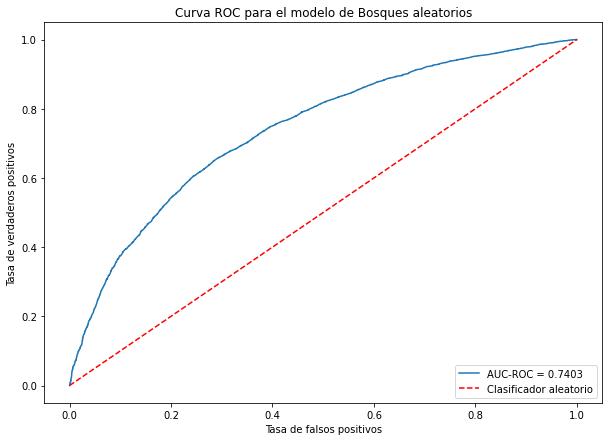

In [58]:
# Bosques aleatorios:

# Definir parámetros para la búsqueda en cuadrícula (GridSearch)
rf_params = {
    "n_estimators": [10, 50, 100, 200],  # Número de árboles en el bosque
    "max_depth": [None, 10, 20, 30],     # Profundidad máxima de los árboles
}

# Crear un objeto GridSearchCV con el modelo RandomForestClassifier y los parámetros definidos
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)

# Ajustar el GridSearchCV con los datos de entrenamiento
rf_grid.fit(X_train, y_train)

# Obtener el mejor modelo de bosque aleatorio después de la búsqueda en cuadrícula
best_rf = rf_grid.best_estimator_

# Hacer predicciones usando el mejor modelo de bosque aleatorio
y_pred_rf = best_rf.predict(X_test)

# Calcular y mostrar la precisión (accuracy) del modelo
print(f"Random Forest - Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Imprimir el informe de clasificación con las métricas de evaluación
print(classification_report(y_test, y_pred_rf))

# Imprimir los mejores hiperparámetros encontrados por GridSearchCV
print(f"Best parameters: {rf_grid.best_params_}\n")

# Ver los mejores hiperparámetros y puntajes de validación cruzada
print("Mejor puntaje de validación cruzada: {:.2f}".format(rf_grid.best_score_))

# Reportar desempeño del modelo en conjunto de entrenamiento y validación
print("Desempeño en conjunto de entrenamiento: {:.2f}".format(rf_grid.score(X_train, y_train)))
print("Desempeño en conjunto de validación: {:.2f}".format(rf_grid.score(X_test, y_test)))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión para el modelo de Bosques aleatorios")
plt.show()

# Obtener las probabilidades de clase positiva
y_pred_rf_proba = best_rf.predict_proba(X_test)[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print(f"Random Forest - AUC-ROC: {auc_roc_rf:.4f}")

# Calcular la curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f"AUC-ROC = {auc_roc_rf:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Clasificador aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para el modelo de Bosques aleatorios")
plt.legend(loc="lower right")
plt.show()

MLP - Accuracy: 0.6256
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      5046
           1       0.62      0.63      0.62      4854

    accuracy                           0.63      9900
   macro avg       0.63      0.63      0.63      9900
weighted avg       0.63      0.63      0.63      9900

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}

Mejor puntaje de validación cruzada: 0.63
Desempeño en conjunto de entrenamiento: 1.00
Desempeño en conjunto de validación: 0.63
Matriz de confusión:
[[3156 1890]
 [1817 3037]]


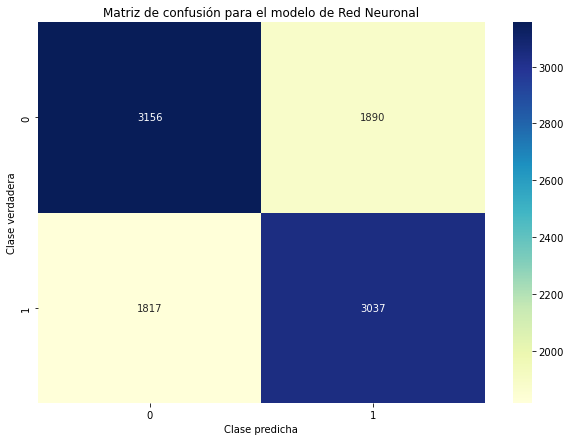

MLP - AUC-ROC: 0.6713


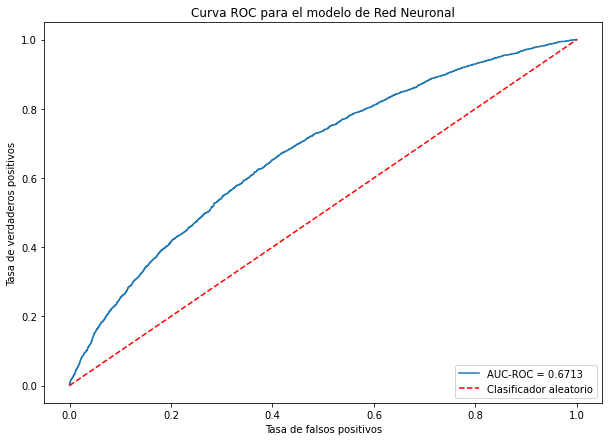

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve
# Modelo Red Neuronal:

# Definir los hiperparámetros para el modelo MLP:
mlp_params = {
    "hidden_layer_sizes": [(10,), (20,)],
    "alpha": [0.01],
    "learning_rate_init": [0.01],
}

# Crea un objeto GridSearchCV para el modelo MLP
mlp_grid = GridSearchCV(MLPClassifier(random_state=42), mlp_params, cv=5)

# Ajuste del GridSearchCV con los datos de entrenamiento
mlp_grid.fit(X_train, y_train)

# Modelo MLP con los mejores hiperparámetros
best_mlp = mlp_grid.best_estimator_

# Predicción y evaluación del modelo en el conjunto de prueba
y_pred = best_mlp.predict(X_test)
print(f"MLP - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

# Ver los mejores hiperparámetros y puntajes de validación cruzada
print(f"Best parameters: {mlp_grid.best_params_}\n")
print("Mejor puntaje de validación cruzada: {:.2f}".format(mlp_grid.best_score_))

# Reportar desempeño del modelo en conjunto de entrenamiento y validación
print("Desempeño en conjunto de entrenamiento: {:.2f}".format(mlp_grid.score(X_train, y_train)))
print("Desempeño en conjunto de validación: {:.2f}".format(mlp_grid.score(X_test, y_test)))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.title("Matriz de confusión para el modelo de Red Neuronal")
plt.show()

# Obtener las probabilidades de clase positiva
y_pred_proba = best_mlp.predict_proba(X_test)[:, 1]

# Calcular la puntuación AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"MLP - AUC-ROC: {auc_roc:.4f}")

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Clasificador aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC para el modelo de Red Neuronal")
plt.legend(loc="lower right")
plt.show()

En cuanto a la justificación de los hiperparámetros y la búsqueda en cuadrícula, es importante tener en cuenta los siguientes aspectos:

Tamaño del conjunto de datos: El tamaño del conjunto de datos puede influir en la elección de los hiperparámetros. En general, si el conjunto de datos es grande, es posible utilizar modelos más complejos y hiperparámetros más ajustados sin temor a sobreajustar el modelo. Por otro lado, si el conjunto de datos es pequeño, es necesario utilizar modelos más simples y evitar hiperparámetros muy ajustados.

Complejidad del modelo: La complejidad del modelo está relacionada con el número de hiperparámetros que se pueden ajustar. Si el modelo es muy complejo, es necesario ajustar los hiperparámetros con más cuidado para evitar el sobreajuste.

Objetivos del modelo: Los objetivos del modelo también pueden influir en la elección de los hiperparámetros. Por ejemplo, si el objetivo es maximizar la precisión del modelo, es posible que se desee utilizar hiperparámetros diferentes a los que se utilizarían si el objetivo fuera maximizar la sensibilidad o la especificidad.

Características del conjunto de datos: Las características del conjunto de datos también pueden influir en la elección de los hiperparámetros. Por ejemplo, si los datos están desequilibrados, es posible que se necesite ajustar los hiperparámetros de forma diferente a si los datos estuvieran equilibrados.

En general, la búsqueda en cuadrícula implica probar diferentes valores de hiperparámetros en un rango predefinido y evaluar su desempeño en el conjunto de validación. Luego se seleccionan los valores que dan el mejor desempeño y se utilizan para entrenar el modelo en todo el conjunto de datos de entrenamiento.

La justificación de los valores de los hiperparámetros seleccionados se basa en la evaluación del desempeño del modelo en el conjunto de validación y la comparación con otros modelos. Si un modelo con un conjunto particular de hiperparámetros tiene un mejor desempeño que otros modelos, entonces se puede justificar la elección de esos hiperparámetros.

Sin embargo, estos valores no son exhaustivos ni definitivos y podrían no ser los mejores para el problema específico. La idea es proporcionar un punto de partida para la búsqueda de hiperparámetros, que podría ajustarse según los resultados obtenidos y el conocimiento del dominio.

Cabe destacar que, en la práctica, la elección de los hiperparámetros puede variar según el problema específico y el conjunto de datos. Es recomendable realizar una búsqueda exhaustiva de hiperparámetros utilizando técnicas como GridSearchCV o RandomizedSearchCV, y también tener en cuenta el conocimiento del dominio y la experiencia previa.

# Sobre las métricas de evaluación de modelos:

Estas dependen del problema y de los objetivos específicos del proyecto. Sin embargo, aquí hay algunas métricas comunes que se utilizan para evaluar modelos de clasificación como Regresión logística, Support Vector Machines (SVM), Naive Bayes, Random Forest y Neural Network (MLP):

Accuracy (Exactitud): Mide la proporción de predicciones correctas respecto al total de predicciones. Es útil cuando las clases están equilibradas, pero puede ser engañoso si las clases están desequilibradas.

Precision (Precisión): Mide la proporción de verdaderos positivos frente al total de positivos predichos. Es útil cuando nos importa más minimizar los falsos positivos.

Recall (Exhaustividad): Mide la proporción de verdaderos positivos frente al total de casos positivos reales. Es útil cuando nos importa más minimizar los falsos negativos.

F1-score: Es una métrica que combina la precisión y la exhaustividad en un solo valor, utilizando la media armónica. F1-score es útil cuando se busca un equilibrio entre la precisión y la exhaustividad y cuando las clases están desequilibradas. 

AUC-ROC (Area Under the Curve - Receiver Operating Characteristic): Mide el rendimiento del modelo a través de diferentes umbrales de clasificación. AUC-ROC es útil cuando se desea evaluar la capacidad de un modelo para distinguir entre clases, independientemente del umbral de clasificación específico.
Es especialmente útil cuando se trata de problemas de clasificación binaria desequilibrados, ya que proporciona una medida de la capacidad del modelo para distinguir entre las dos clases independientemente del umbral de clasificación elegido.

Confusion Matrix (Matriz de confusión): Proporciona una descripción detallada del rendimiento del modelo, mostrando verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. La matriz de confusión es útil para comprender el rendimiento del modelo en términos de errores de tipo I y tipo II.

La elección de las métricas depende del contexto y de los objetivos del proyecto. Por ejemplo, si se busca un modelo que identifique correctamente todos los casos positivos, incluso a expensas de algunos falsos positivos, la exhaustividad puede ser la métrica más importante. Por otro lado, si se busca un modelo que minimice los falsos positivos, la precisión podría ser más relevante.

Es importante considerar múltiples métricas al evaluar un modelo, ya que cada métrica proporciona una perspectiva diferente sobre el rendimiento del modelo. Además, es fundamental analizar las métricas en conjunto y no depender únicamente de una sola métrica.

# 5. Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que el modelo serializado debe ser posterior al fit, para poder ejecutar predict en los nuevos datos.


# Selección del mejor modelo:

De acuerdo con estas métricas, el modelo de Regresión logística tiene el mejor equilibrio entre precisión (accuracy) y AUC-ROC. Aunque SVM tiene una precisión ligeramente más alta, su AUC-ROC es más bajo que el de la Regresión logística. Dado que el AUC-ROC es una medida importante para evaluar el rendimiento de clasificadores binarios, especialmente en situaciones en las que la distribución de clases puede estar desequilibrada, seleccionaría el modelo de Regresión logística como el mejor en este caso.

Basado en la precisión y el AUC-ROC, el ranking de los modelos de mejor a peor es el siguiente:

- 1.Logistic Regression
- 2.Support Vector Machines (SVM)
- 3.Naive Bayes
- 4.Random Forest
- 5.Red Neuronal (MLP)

# Resumen Clave:

Resumen de las métricas claves de cada modelo:

- Regresión logística:

Accuracy: 0.6881;
AUC-ROC: 0.7553

- Máquinas de soporte vectorial (SVM):

Accuracy: 0.6882;
AUC-ROC: 0.7401

- Naive Bayes multinomial:

Accuracy: 0.6870;
AUC-ROC: 0.7526

- Bosque aleatorio:

Accuracy: 0.6741;
AUC-ROC: 0.7541

- Perceptrón multicapa (MLP):

Accuracy: 0.6309;
AUC-ROC: 0.6738

# Resumen Total:

### Logistic Regression - Accuracy: 0.6881

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      5016
           1       0.70      0.64      0.67      4884

    accuracy                           0.69      9900
   macro avg       0.69      0.69      0.69      9900
weighted avg       0.69      0.69      0.69      9900

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Mejor puntaje de validación cruzada: 0.68

Desempeño en conjunto de entrenamiento: 0.76

Desempeño en conjunto de validación: 0.69

Matriz de confusión:
[[3670 1346]
 [1742 3142]]
 
Logistic Regression - AUC-ROC: 0.7553

### Support Vector Machines - Accuracy: 0.6882

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      5016
           1       0.70      0.64      0.67      4884

    accuracy                           0.69      9900
   macro avg       0.69      0.69      0.69      9900
weighted avg       0.69      0.69      0.69      9900

Best parameters: {'C': 0.01}

Mejor puntaje de validación cruzada: 0.68

Desempeño en conjunto de entrenamiento: 0.76

Desempeño en conjunto de validación: 0.69

Matriz de confusión:

[[3694 1322]
 [1765 3119]]
 
Support Vector Machines - AUC-ROC: 0.7401

### Naive Bayes - Accuracy: 0.6870

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      5016
           1       0.73      0.58      0.65      4884

    accuracy                           0.69      9900
   macro avg       0.69      0.69      0.68      9900
weighted avg       0.69      0.69      0.68      9900

Best parameters: {'alpha': 10}

Mejor puntaje de validación cruzada: 0.67

Desempeño en conjunto de entrenamiento: 0.75

Desempeño en conjunto de validación: 0.69

Matriz de confusión:

[[3944 1072]
 [2027 2857]]
 
Naive Bayes - AUC-ROC: 0.7526

### Random Forest - Accuracy: 0.6741

              precision    recall  f1-score   support

           0       0.64      0.81      0.72      5016
           1       0.73      0.53      0.62      4884

    accuracy                           0.67      9900
   macro avg       0.69      0.67      0.67      9900
weighted avg       0.69      0.67      0.67      9900

Best parameters: {'max_depth': 30, 'n_estimators': 200}

Mejor puntaje de validación cruzada: 0.67

Desempeño en conjunto de entrenamiento: 0.79

Desempeño en conjunto de validación: 0.67

Matriz de confusión:

[[4067  949]
 [2277 2607]]
 
Random Forest - AUC-ROC: 0.7541

### MLP - Accuracy: 0.6309

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      5016
           1       0.62      0.64      0.63      4884

    accuracy                           0.63      9900
   macro avg       0.63      0.63      0.63      9900
weighted avg       0.63      0.63      0.63      9900

Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01}

Mejor puntaje de validación cruzada: 0.63

Desempeño en conjunto de entrenamiento: 1.00

Desempeño en conjunto de validación: 0.63

Matriz de confusión:

[[3123 1893]
 [1761 3123]]
 
MLP - AUC-ROC: 0.6738

# Sobre los tipos de errores tipo I y II:
Los errores de tipo I y tipo II son dos tipos de errores que pueden ocurrir en la toma de decisiones estadísticas, especialmente en pruebas de hipótesis. Estos errores están relacionados con la aceptación o rechazo incorrecto de una hipótesis.

Error de tipo I: También conocido como un "falso positivo", ocurre cuando se rechaza una hipótesis nula verdadera. En otras palabras, el error de tipo I sucede cuando se identifica un efecto o relación que en realidad no existe. El nivel de significancia (alfa, α) es la probabilidad máxima de cometer un error de tipo I y generalmente se establece en un umbral como 0.05 o 0.01.

Error de tipo II: También conocido como un "falso negativo", ocurre cuando se acepta una hipótesis nula falsa. Es decir, el error de tipo II sucede cuando no se identifica un efecto o relación existente. La potencia estadística (1 - beta, 1 - β) es la probabilidad de rechazar correctamente una hipótesis nula falsa y se utiliza para medir la probabilidad de no cometer un error de tipo II.

En el contexto de la clasificación de modelos de aprendizaje automático, como la regresión logística, estos errores se pueden relacionar de la siguiente manera:

Error de tipo I: Se predice que una instancia pertenece a una clase (positiva) cuando en realidad pertenece a otra clase (negativa). En la matriz de confusión, esto se correspondería con los falsos positivos (FP).

Error de tipo II: Se predice que una instancia pertenece a una clase (negativa) cuando en realidad pertenece a otra clase (positiva). En la matriz de confusión, esto se correspondería con los falsos negativos (FN).

El equilibrio entre los errores de tipo I y tipo II depende del problema y el contexto. A veces, es más importante minimizar uno de los errores a expensas del otro. Por ejemplo, en un diagnóstico médico, un falso negativo (error de tipo II) puede ser más grave que un falso positivo (error de tipo I), ya que un paciente con una enfermedad no diagnosticada podría no recibir el tratamiento adecuado.

In [62]:
# Guardar el modelo de Regresión Logística
pickle.dump(best_logreg, open("mejor-modelo-logreg-1-sebaguimad.sav", "wb"))

# Guardar el modelo de Máquinas de Vectores de Soporte (SVM)
pickle.dump(best_svm, open("mejor-modelo-svm-2-sebaguimad.sav", "wb"))

In [61]:
# Guardar los conjuntos de datos

pickle.dump(X_train,open('X_train-analisis-sentimientos-tweet-sebaguimad.sav', 'wb'))
pickle.dump(X_test,open('X_test-analisis-sentimientos-tweet-sebaguimad.sav', 'wb'))
pickle.dump(y_train,open('y_train-analisis-sentimientos-tweet-sebaguimad.sav', 'wb'))
pickle.dump(y_test,open('y_test-analisis-sentimientos-tweet-sebaguimad.sav', 'wb'))